In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sktime.utils.plotting import plot_series
from darts import TimeSeries

# Modelo THETA DIARIO

In [138]:
#cargame los pickle y_test_diario y Y_train_diario
y_test_diario = pd.read_pickle('y_test_diario.pkl')
y_train_diario = pd.read_pickle('y_train_diario.pkl')

y_diario = pd.concat([y_train_diario, y_test_diario])
y_diario.head()

#Dime los ultimos valores de y_train_diario
y_train_diario.tail()


,Visitantes totales
fecha,
2016-03-09,31463
2016-03-10,28445
2016-03-11,31605
2016-03-12,18321
2016-03-13,12674


In [139]:
#Lo pasamos a timeseries para poder trabajar con darts
ts_y_diario = TimeSeries.from_series(y_diario['Visitantes totales'], freq='D') #freq='D' es para que tome los datos como diarios
ts_y_diario

<TimeSeries (DataArray) (fecha: 1461, component: 1, sample: 1)>
array([[[ 2338.]],

       [[ 9376.]],

       [[ 9190.]],

       ...,

       [[24279.]],

       [[22763.]],

       [[ 5346.]]])
Coordinates:
  * fecha      (fecha) datetime64[ns] 2013-01-01 2013-01-02 ... 2016-12-31
  * component  (component) object 'Visitantes totales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='fecha'>

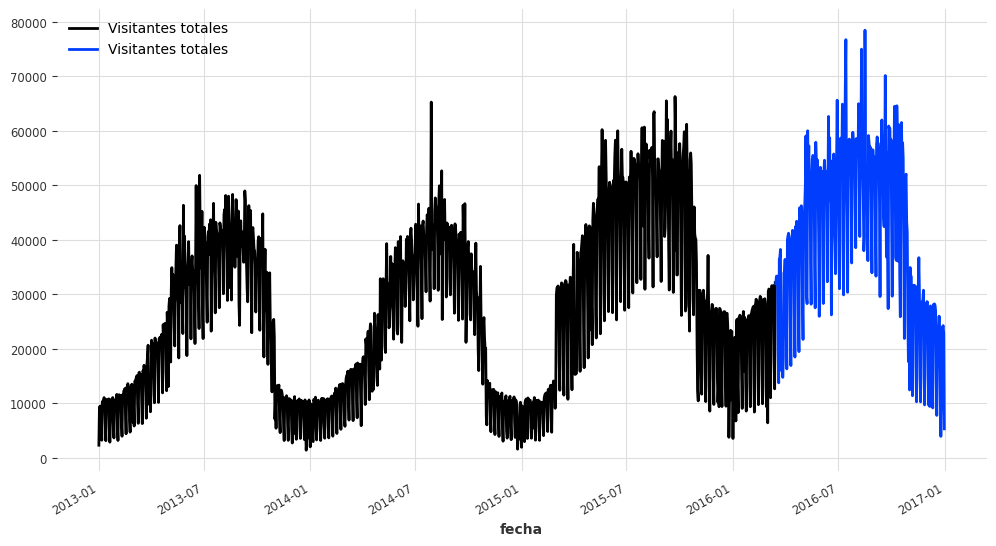

In [140]:
#Dividimos train y test 80/20
train_diario, val_diario = ts_y_diario[:-292], ts_y_diario[-292:]
train_diario.plot()
val_diario.plot()

In [141]:
#Entrenamos el modelo y hacemos la prediccion
from darts.models import Theta, FourTheta
from darts.metrics import mape

model_theta_diario = Theta(seasonality_period=7, theta=0.5)
model_theta_diario.fit(train_diario)
forecast_theta_diario = model_theta_diario.predict(len(val_diario))
print("model {} obtains MAPE: {:.2f}%".format(model_theta_diario, mape(val_diario, forecast_theta_diario)))

model Theta(theta=0.5, seasonality_period=7) obtains MAPE: 42.82%


C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='fecha'>

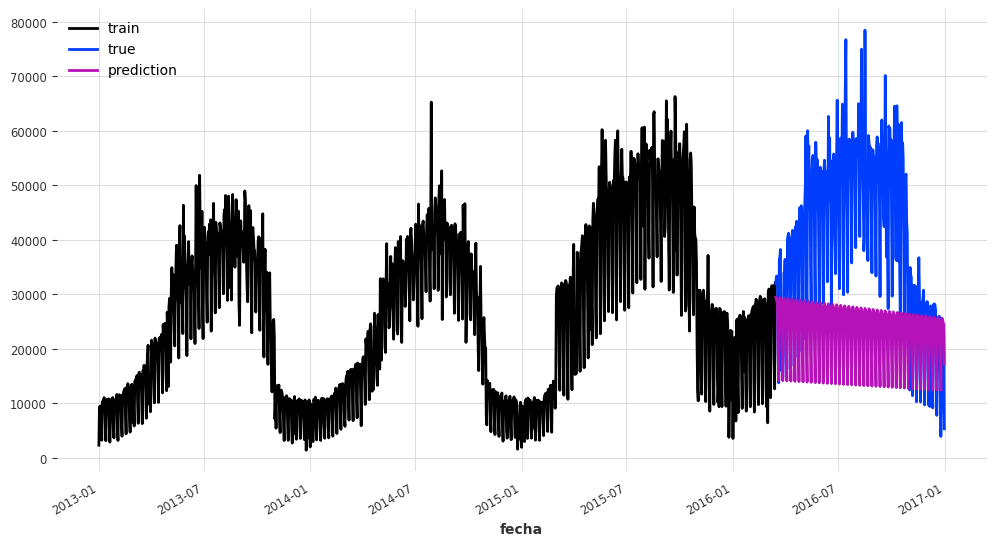

In [142]:
# Evaluamos resultados
train_diario.plot(label="train")
val_diario.plot(label="true")
forecast_theta_diario.plot(label="prediction")

In [146]:
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0




for theta in thetas:

    model = Theta(theta)
    model.fit(train_diario)
    pred_theta = model.predict(len(val_diario))
    res = mape(val_diario, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\e

C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\e

In [175]:
#Obtenemos el mejor theta
# %%
best_theta_model = Theta(best_theta)
best_theta_model.fit(train_diario)
forecast_theta_diario_bueno = best_theta_model.predict(len(val_diario)) 

print("The MAPE is: {:.2f}, with theta = {}.".format(mape(val_diario, forecast_theta_diario_bueno), best_theta)
)

The MAPE is: 42.05, with theta = 0.9795918367346932.


C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='fecha'>

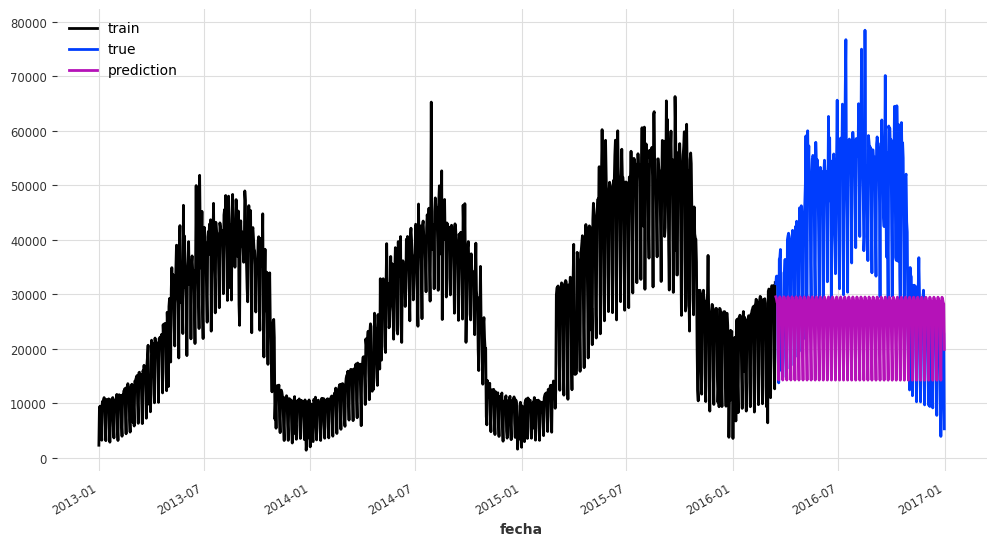

In [176]:
# Visualizamos pred
train_diario.plot(label="train")
val_diario.plot(label="true")
forecast_theta_diario_bueno.plot(label="prediction")

# Modelo 4THETA DIARIO

In [148]:
#Modelo 4theta
model =FourTheta(seasonality_period=7)
model.fit(train_diario)
forecast_4theta_diario = model.predict(len(val_diario))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val_diario, forecast_4theta_diario)))

model FourTheta(seasonality_period=7) obtains MAPE: 42.19%


<Axes: xlabel='fecha'>

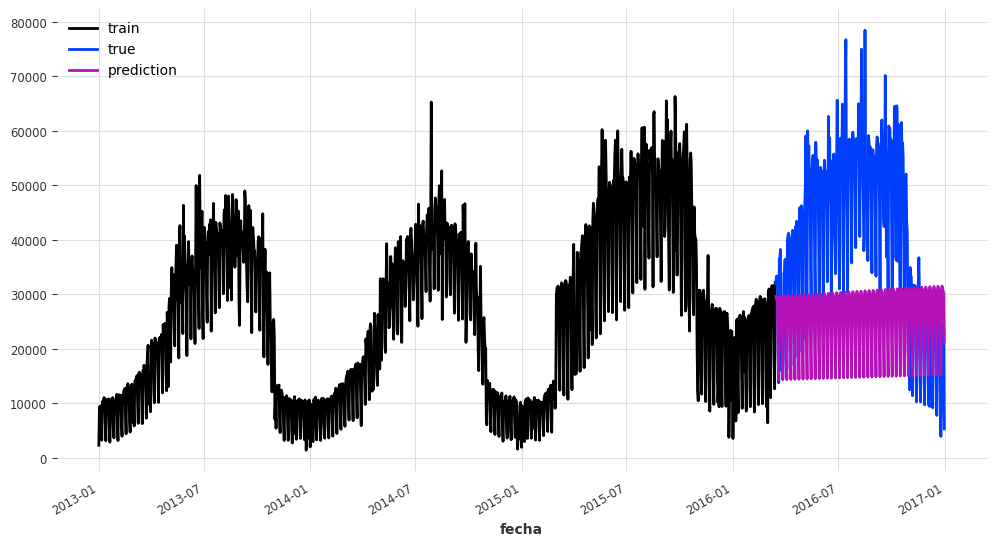

In [149]:
# Visualizamos pred
train_diario.plot(label="train")
val_diario.plot(label="true")
forecast_4theta_diario.plot(label="prediction")

In [150]:
#Buscamos los mejores parámetros
from darts.utils.utils import SeasonalityMode, TrendMode, ModelMode
theta_grid = {
    #'theta':2- np.linspace(-10, 10, 10),
    'theta':[-4,-3,-2,-1,1,2,3,4],
    'model_mode': [ModelMode.ADDITIVE,ModelMode.MULTIPLICATIVE],
    'season_mode': [SeasonalityMode.MULTIPLICATIVE,SeasonalityMode.ADDITIVE],
    'trend_mode': [TrendMode.EXPONENTIAL,TrendMode.LINEAR]
}

best_grid_model=FourTheta.gridsearch(parameters=theta_grid,
                                series=train_diario,
                                forecast_horizon=7, # 12
                                start=0.5,
                                last_points_only=False,
                                metric=mape,
                                reduction=np.mean,
                                verbose=True,
                                n_jobs=-1)

best_grid_model

  0%|          | 0/64 [00:00<?, ?it/s]

(FourTheta(theta=-1, seasonality_period=None, season_mode=SeasonalityMode.MULTIPLICATIVE, model_mode=ModelMode.MULTIPLICATIVE, trend_mode=TrendMode.LINEAR, normalization=True),
 {'theta': -1,
  'model_mode': <ModelMode.MULTIPLICATIVE: 'multiplicative'>,
  'season_mode': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>,
  'trend_mode': <TrendMode.LINEAR: 'linear'>},
 26.67960340093839)

<Axes: xlabel='fecha'>

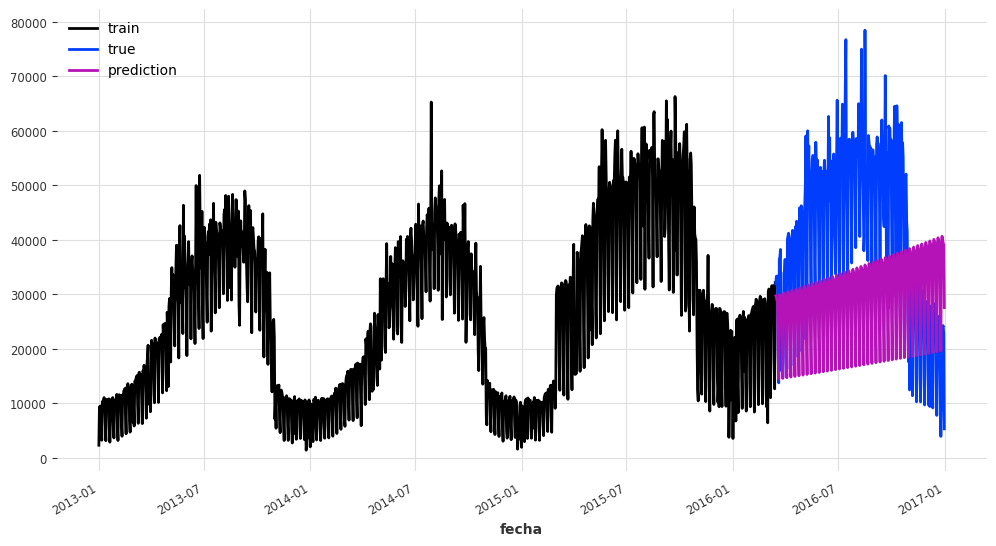

In [151]:
#Entrenamos y predecimos con los mejores parámetros
modelo_4theta_diario=FourTheta(theta=best_grid_model[1]['theta'],
                 model_mode=ModelMode.ADDITIVE,
                 season_mode=SeasonalityMode.MULTIPLICATIVE,
                 trend_mode=TrendMode.EXPONENTIAL
                 )
modelo_4theta_diario.fit(train_diario)
forecast_4theta_diario_bueno = modelo_4theta_diario.predict(len(val_diario))

train_diario.plot(label="train")
val_diario.plot(label="true")
forecast_4theta_diario_bueno.plot(label="prediction")

The MAPE is: 44.68, with theta = 0.9795918367346932.
model FourTheta(seasonality_period=52) obtains MAPE: 42.05%


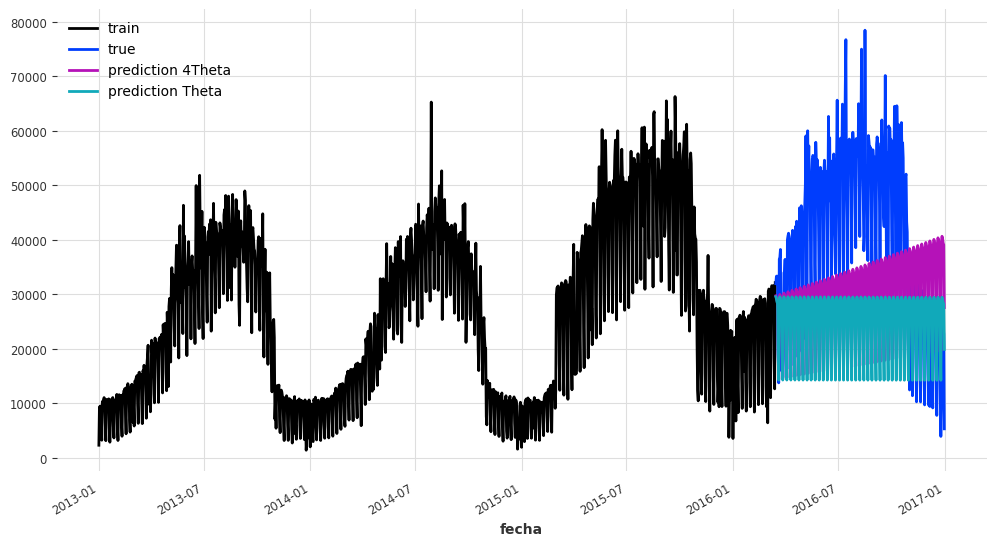

In [177]:
#Gráficamos theta y 4theta para comparar
train_diario.plot(label="train")
val_diario.plot(label="true")
forecast_4theta_diario_bueno.plot(label="prediction 4Theta")
forecast_theta_diario_bueno.plot(label="prediction Theta")
print("The MAPE is: {:.2f}, with theta = {}.".format(mape(val_diario, forecast_4theta_diario_bueno), best_theta))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val_diario, forecast_theta_diario_bueno)))


<Axes: xlabel='fecha'>

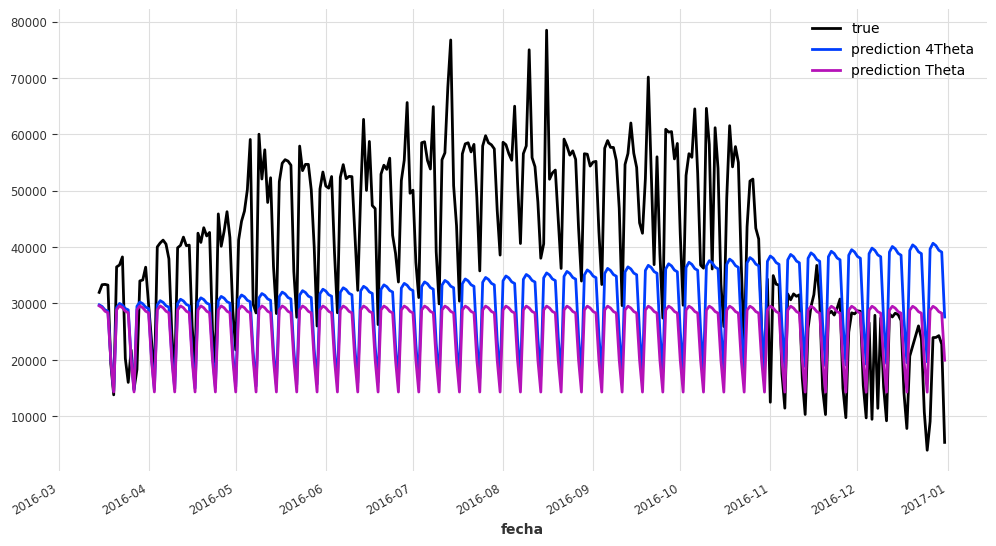

In [178]:
#Más de cerca
val_diario.plot(label="true")
forecast_4theta_diario_bueno.plot(label="prediction 4Theta")
forecast_theta_diario_bueno.plot(label="prediction Theta")

# Modelo THETA SEMANAL

In [154]:
#cargame los pickle y_test_semanal y Y_train_semanal
y_test_semanal = pd.read_pickle('y_test_semanal.pkl')
y_train_semanal = pd.read_pickle('y_train_semanal.pkl')

y_semanal = pd.concat([y_train_semanal, y_test_semanal])
y_semanal.head()

,Visitantes totales
2013-01-06,39175
2013-01-13,62527
2013-01-20,59026
2013-01-27,57169
2013-02-03,62514


In [155]:
from darts import TimeSeries
# Convertir a TimeSeries de Darts
ts_y_semanal = TimeSeries.from_series(y_semanal['Visitantes totales'], freq='W')


In [156]:
ts_y_semanal

<TimeSeries (DataArray) (time: 209, component: 1, sample: 1)>
array([[[ 39175.]],

       [[ 62527.]],

       [[ 59026.]],

       [[ 57169.]],

       [[ 62514.]],

       [[ 66035.]],

       [[ 72133.]],

       [[ 77099.]],

       [[ 71664.]],

       [[ 88558.]],

...

       [[275144.]],

       [[177340.]],

       [[183785.]],

       [[178930.]],

       [[169215.]],

       [[163800.]],

       [[126999.]],

       [[160893.]],

       [[131712.]],

       [[109333.]]])
Coordinates:
  * time       (time) datetime64[ns] 2013-01-06 2013-01-13 ... 2017-01-01
  * component  (component) object 'Visitantes totales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='time'>

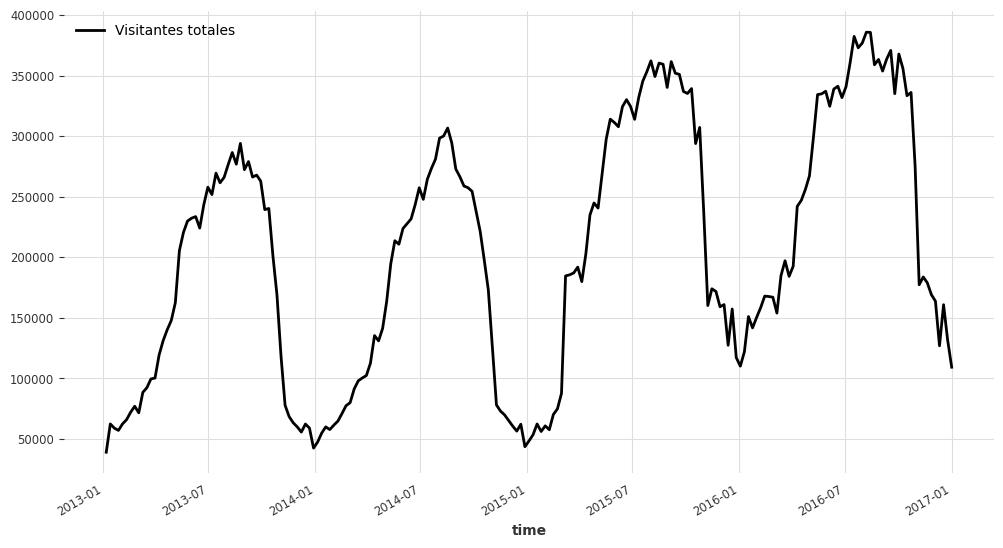

In [157]:
#import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
ts_y_semanal.plot()

<Axes: xlabel='time'>

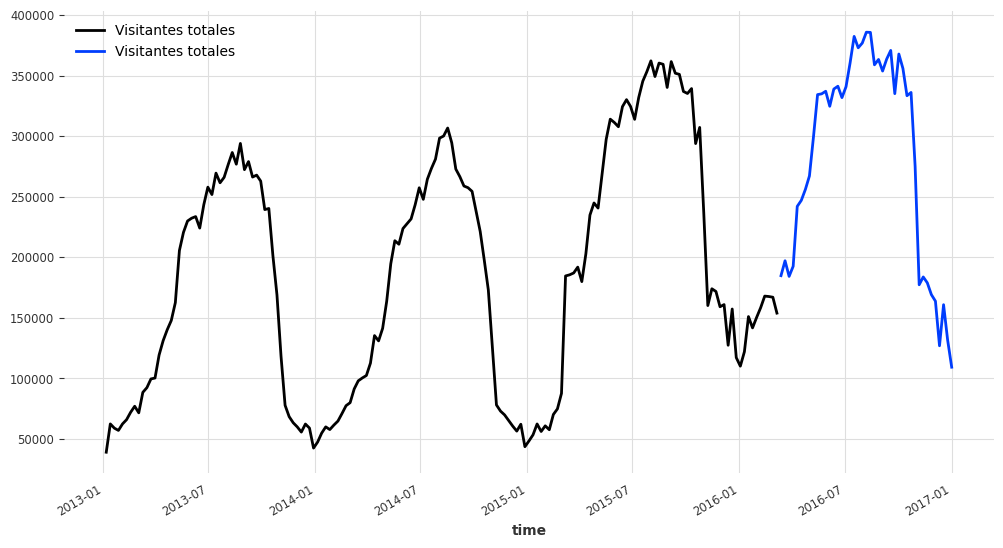

In [158]:
#Separamos en train y test
train, val = ts_y_semanal.split_before(0.80)
train.plot()
val.plot()

In [159]:
#Entrenamos y predecimos theta semanal
from darts.models import Theta, FourTheta
from darts.metrics import mape

model = Theta(seasonality_period=52, theta=0.5)
model.fit(train)
forecast = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


model Theta(theta=0.5, seasonality_period=52) obtains MAPE: 14.69%


C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='time'>

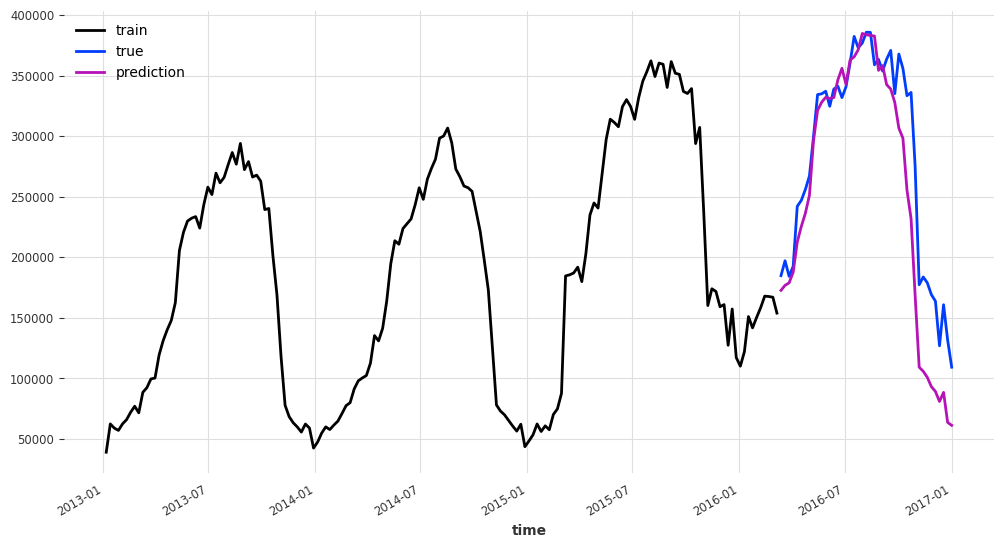

In [160]:
#Visualiazmos gráficos
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

In [161]:
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0




for theta in thetas:

    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\e

C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pepe\anaconda3\e

In [162]:
best_theta

0.9795918367346932

In [163]:
#Obtenemos el mejor theta
# %%
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
forecast_theta = model.predict(n=44) 

print("The MAPE is: {:.2f}, with theta = {}.".format(mape(val, forecast_theta), best_theta)
)

The MAPE is: 14.54, with theta = 0.9795918367346932.


C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='time'>

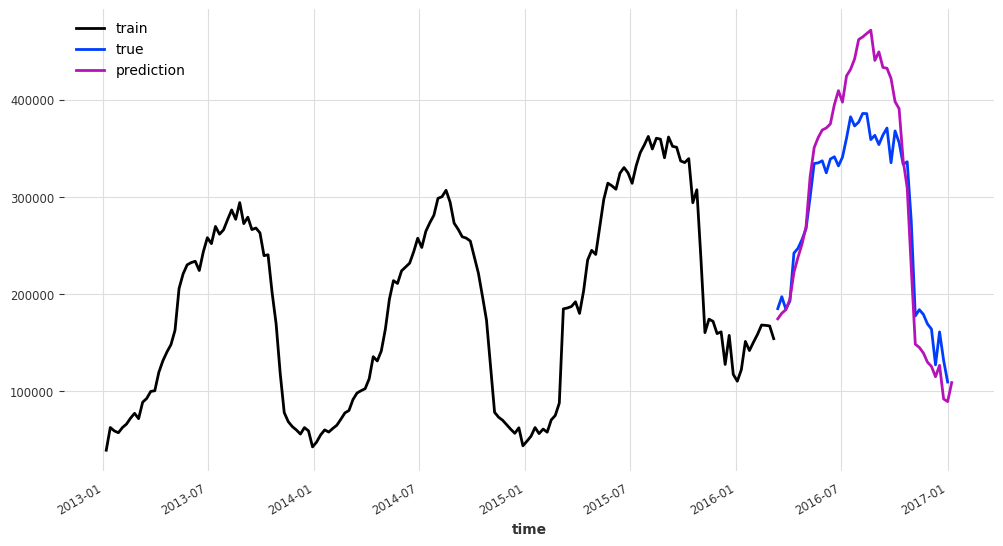

In [164]:
#Graficamos
train.plot(label="train")
val.plot(label="true")
forecast_theta.plot(label="prediction")

In [165]:
best_theta_model.model_params

OrderedDict([('theta', 0.9795918367346932),
             ('seasonality_period', None),
             ('season_mode',
              <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>)])

# Modelo 4THETA SEMANAL

In [166]:
#Modelo 4 thetha semanal
model =FourTheta(seasonality_period=52)
model.fit(train)
forecast = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))

model FourTheta(seasonality_period=52) obtains MAPE: 13.61%


<Axes: xlabel='time'>

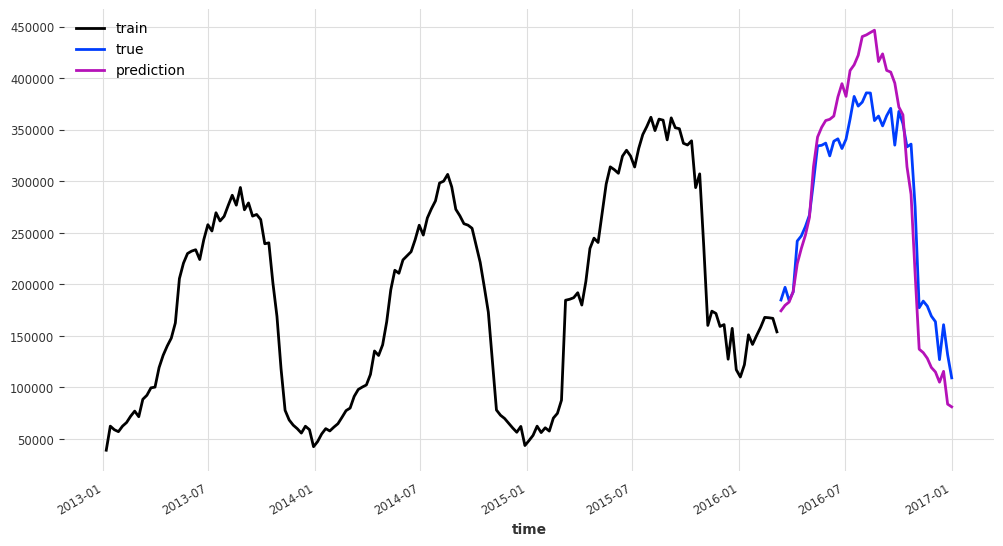

In [167]:
# Graficamos resultados
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

In [168]:
#Buscamos mejores hiperparámetros
from darts.utils.utils import SeasonalityMode, TrendMode, ModelMode
theta_grid = {
    #'theta':2- np.linspace(-10, 10, 10),
    'theta':[-4,-3,-2,-1,1,2,3,4],
    'model_mode': [ModelMode.ADDITIVE,ModelMode.MULTIPLICATIVE],
    'season_mode': [SeasonalityMode.MULTIPLICATIVE,SeasonalityMode.ADDITIVE],
    'trend_mode': [TrendMode.EXPONENTIAL,TrendMode.LINEAR]
}

best_grid_model=FourTheta.gridsearch(parameters=theta_grid,
                                series=train,
                                forecast_horizon=52, # 12
                                start=0.5,
                                last_points_only=False,
                                metric=mape,
                                reduction=np.mean,
                                verbose=True,
                                n_jobs=-1)

best_grid_model

  0%|          | 0/64 [00:00<?, ?it/s]

(FourTheta(theta=1, seasonality_period=None, season_mode=SeasonalityMode.ADDITIVE, model_mode=ModelMode.ADDITIVE, trend_mode=TrendMode.EXPONENTIAL, normalization=True),
 {'theta': 1,
  'model_mode': <ModelMode.ADDITIVE: 'additive'>,
  'season_mode': <SeasonalityMode.ADDITIVE: 'additive'>,
  'trend_mode': <TrendMode.EXPONENTIAL: 'exponential'>},
 78.91713012523658)

<Axes: xlabel='time'>

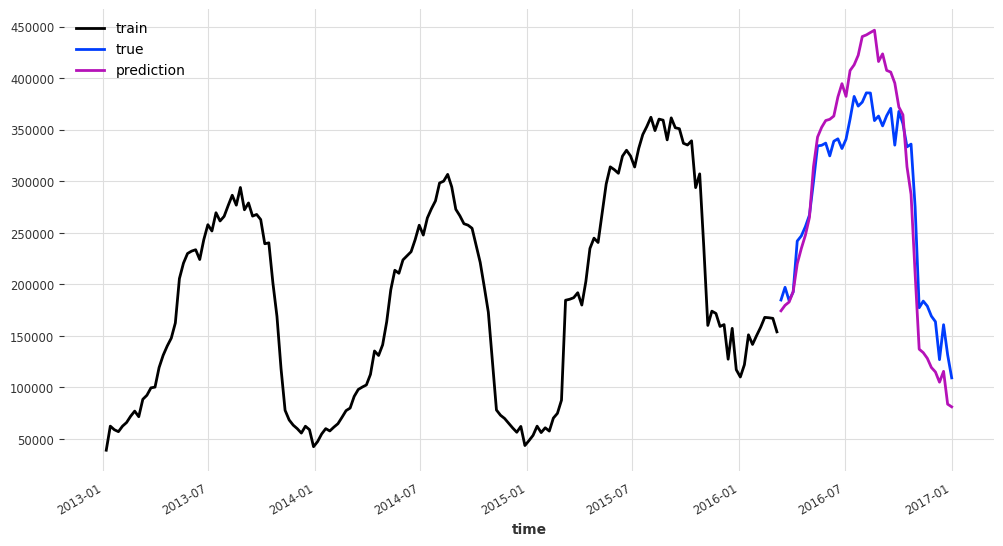

In [169]:
#Elaboramos modelo con mejores hiperparámetros
modelo_4theta=FourTheta(theta=best_grid_model[1]['theta'],
                 model_mode=ModelMode.ADDITIVE,
                 season_mode=SeasonalityMode.ADDITIVE,
                 trend_mode=TrendMode.EXPONENTIAL
                 )
modelo_4theta.fit(train)
forecast_4theta = model.predict(n=43)

train.plot(label="train")
val.plot(label="true")
forecast_4theta.plot(label="prediction")

In [170]:
#Evaluamos métricas
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

print("The MAPE is: {:.2f}, with theta = {}.".format(mape(val, forecast_theta), best_theta)
)
forecast_theta


The MAPE is: 14.54, with theta = 0.9795918367346932.


<TimeSeries (DataArray) (time: 44, component: 1, sample: 1)>
array([[[174357.19146354]],

       [[180130.98478547]],

       [[183786.56398983]],

       [[194421.89163991]],

       [[222116.9336701 ]],

       [[237691.06397014]],

       [[251321.86325285]],

       [[269462.83479356]],

       [[320508.609675  ]],

       [[350565.0194641 ]],

...

       [[148240.28192556]],

       [[144904.10269914]],

       [[139217.63814959]],

       [[129845.98996119]],

       [[125358.16560401]],

       [[114786.61879393]],

       [[126528.65028768]],

       [[ 91909.01086078]],

       [[ 89219.01274404]],

       [[108768.98073717]]])
Coordinates:
  * time       (time) datetime64[ns] 2016-03-13 2016-03-20 ... 2017-01-08
  * component  (component) object 'Visitantes totales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='time'>

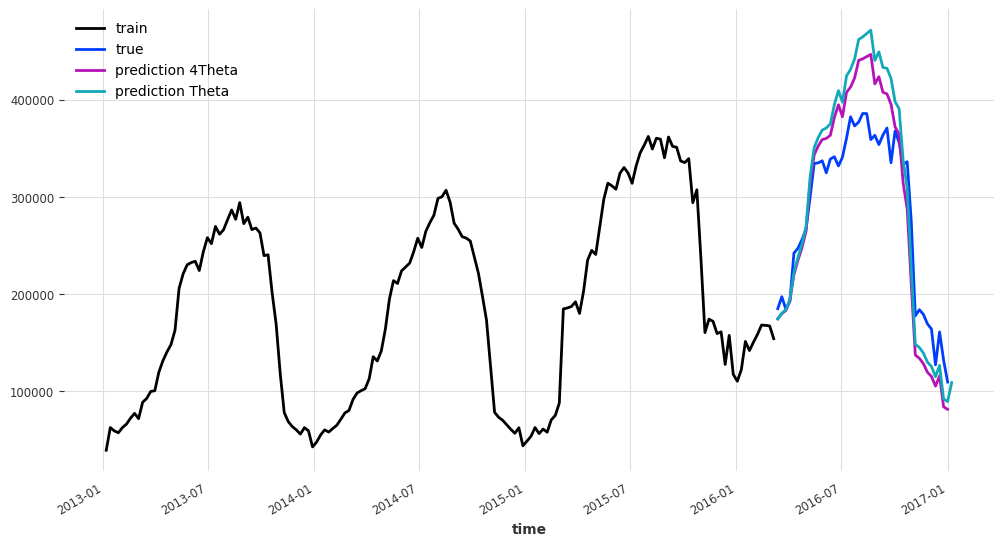

In [171]:
#Observamos resultados
train.plot(label="train")
val.plot(label="true")
forecast_4theta.plot(label="prediction 4Theta")
forecast_theta.plot(label="prediction Theta")
